In [67]:
import pandas as pd
import numpy as np

# Load your historical data up to 2020
data = pd.read_csv('~/Documents/forecastRenewableProd/renewable.csv')

# Handle missing value
data = data.fillna(0)

# Group the data by the 'Entity' column
grouped_data = data.groupby('Entity')

# Define the list of feature columns
feature_columns = ['Electricity from hydro (TWh)', 'Electricity from wind (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)', 'Total (TWh)']

# Create a new DataFrame for the years 2025 to 2050
years = list(range(2025, 2051))

# Initialize an empty list to store all predictions
all_predictions = []

# Define the exponential smoothing function
def time_series_fit(data):
    alpha = 0.2  # Smoothing parameter
    predictions = {}
    
    for column, values in data.items():
        predictions[column] = []
        prev_pred = values[0]  # Initial prediction is the first value in the series
        
        for value in values:
            # Exponential smoothing formula
            pred = alpha * value + (1 - alpha) * prev_pred
            predictions[column].append(pred)
            prev_pred = pred
        
    return predictions

# Iterate through each entity group
for entity, entity_data in grouped_data:
    # Initialize dictionaries to store predictions for the current entity for each column
    predictions = {'Entity': entity}
    
    # Iterate through each column and perform time series fit
    for column in feature_columns:
        y = entity_data[column].tolist()
        
        # Perform time series fit and get predictions
        column_predictions = time_series_fit({column: y})[column]
        
        # Store the predictions for the current column
        predictions[column] = column_predictions
    
    # Store the predictions for the current entity
    all_predictions.append(predictions)

# Print the predictions for the first entity as an example
print(all_predictions[0])

# Connect to the SQLite database
conn = sqlite3.connect('LSTM.db')


# Query to retrieve data from the database
query = "SELECT * FROM predictions"

# Load data from the database into a DataFrame
data = pd.read_sql_query(query, conn)

print(data)

# Close the database connection
conn.close()


{'Entity': 'Afghanistan', 'Electricity from hydro (TWh)': [0.31, 0.348, 0.39039999999999997, 0.43832, 0.46265600000000007, 0.4881248000000001, 0.51849984, 0.564799872, 0.5598398976000001, 0.6038719180800001, 0.6330975344640001, 0.6264780275712001, 0.6431824220569601, 0.6865459376455681, 0.7432367501164545, 0.7945894000931637, 0.839671520074531, 0.8817372160596249, 0.8913897728476999, 0.88111181827816, 0.828889454622528, 0.7871115636980225], 'Electricity from wind (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Electricity from solar (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0108, 0.01464, 0.017712, 0.022169599999999998, 0.02573568, 0.028588544, 0.032870835200000004, 0.038296668160000005, 0.04663733452800001], 'Other renewables including bioenergy (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Total (TWh)':

In [68]:
# Iterate through each entity group
for entity, entity_data in grouped_data:
    # Initialize dictionaries to store predictions for the current entity for each column
    predictions = {'Entity': entity}
    
    # Iterate through each column and perform time series fit
    for column in feature_columns:
        y = entity_data[column].tolist()
        
        # Perform time series fit and get predictions
        column_predictions = time_series_fit({column: y})[column]
        
        # Store the predictions for the current column
        predictions[column] = column_predictions
    
    # Store the predictions for the current entity
    all_predictions.append(predictions)

# Print the predictions for the first entity as an example
print(all_predictions[0])


{'Entity': 'Afghanistan', 'Electricity from hydro (TWh)': [0.31, 0.348, 0.39039999999999997, 0.43832, 0.46265600000000007, 0.4881248000000001, 0.51849984, 0.564799872, 0.5598398976000001, 0.6038719180800001, 0.6330975344640001, 0.6264780275712001, 0.6431824220569601, 0.6865459376455681, 0.7432367501164545, 0.7945894000931637, 0.839671520074531, 0.8817372160596249, 0.8913897728476999, 0.88111181827816, 0.828889454622528, 0.7871115636980225], 'Electricity from wind (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Electricity from solar (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0108, 0.01464, 0.017712, 0.022169599999999998, 0.02573568, 0.028588544, 0.032870835200000004, 0.038296668160000005, 0.04663733452800001], 'Other renewables including bioenergy (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Total (TWh)':

In [69]:
# Connect to SQLite database
conn = sqlite3.connect('LSTM.db')

# Create the 'predictions' table if it doesn't exist
create_table_query = '''
CREATE TABLE IF NOT EXISTS predictions (
    Entity TEXT,
    Year INTEGER,
    "Electricity from hydro (TWh)" REAL,
    "Electricity from wind (TWh)" REAL,
    "Electricity from solar (TWh)" REAL,
    "Other renewables including bioenergy (TWh)" REAL,
    "Total (TWh)" REAL
);
'''
conn.execute(create_table_query)

# Commit the table creation
conn.commit()

# Iterate through predictions and prepare data for DataFrame and database insertion
# Initialize empty lists to store the new data
new_entities = []
new_years = []
new_hydro_list = []
new_wind_list = []
new_solar_list = []
new_bioenergy_list = []
new_total_list = []

for prediction_data in all_predictions:
    entity = prediction_data['Entity']
    for year, hydro, wind, solar, bioenergy, total in zip(
        years,
        prediction_data['Electricity from hydro (TWh)'],
        prediction_data['Electricity from wind (TWh)'],
        prediction_data['Electricity from solar (TWh)'],
        prediction_data['Other renewables including bioenergy (TWh)'],
        prediction_data['Total (TWh)'],
    ):
        # Check if the combination of 'Year' and 'Entity' exists in the database
        query = f"SELECT * FROM predictions WHERE Year={year} AND Entity='{entity.replace(chr(39), chr(39)*2)}'"
        existing_data = pd.read_sql_query(query, conn)
        
        # If no existing data found, append to the new lists for DataFrame
        if existing_data.empty:
            new_entities.append(entity)
            new_years.append(year)
            new_hydro_list.append(hydro)
            new_wind_list.append(wind)
            new_solar_list.append(solar)
            new_bioenergy_list.append(bioenergy)
            new_total_list.append(total)

# Create a DataFrame from the new data and insert it into the database
new_data = {
    'Entity': new_entities,
    'Year': new_years,
    'Electricity from hydro (TWh)': new_hydro_list,
    'Electricity from wind (TWh)': new_wind_list,
    'Electricity from solar (TWh)': new_solar_list,
    'Other renewables including bioenergy (TWh)': new_bioenergy_list,
    'Total (TWh)': new_total_list
}
new_df = pd.DataFrame(new_data)
new_df.to_sql('predictions', conn, if_exists='append', index=False)


# Commit changes and close the database connection
conn.commit()
conn.close()

# Create the DataFrame after filtering out duplicates
output_df = pd.DataFrame({
    'Entity': entity,
    'Year': years,
    'Electricity from hydro (TWh)': hydro_list,
    'Electricity from wind (TWh)': wind_list,
    'Electricity from solar (TWh)': solar_list,
    'Other renewables including bioenergy (TWh)': bioenergy_list,
    'Total (TWh)': total_list,
})



In [70]:
import pandas as pd
import sqlite3

# Connect to the SQLite database 'LSTM.db'
conn = sqlite3.connect('LSTM.db')

# Query to select all data from the 'predictions' table
query = "SELECT * FROM predictions"

# Read data from the database into a DataFrame
data_from_db = pd.read_sql_query(query, conn)

# Close the connection to the database
conn.close()

# Display the fetched data using Pandas DataFrame
print(data_from_db)


           Entity  Year  Electricity from hydro (TWh)  \
0     Afghanistan  2025                      1.007499   
1     Afghanistan  2026                      1.027357   
2     Afghanistan  2027                      1.047216   
3     Afghanistan  2028                      1.067075   
4     Afghanistan  2029                      1.086934   
...           ...   ...                           ...   
6521     Zimbabwe  2046                      4.416923   
6522     Zimbabwe  2047                      4.409819   
6523     Zimbabwe  2048                      4.402716   
6524     Zimbabwe  2049                      4.395613   
6525     Zimbabwe  2050                      4.388509   

      Electricity from wind (TWh)  Electricity from solar (TWh)  \
0                             0.0                      0.068261   
1                             0.0                      0.071621   
2                             0.0                      0.074980   
3                             0.0              

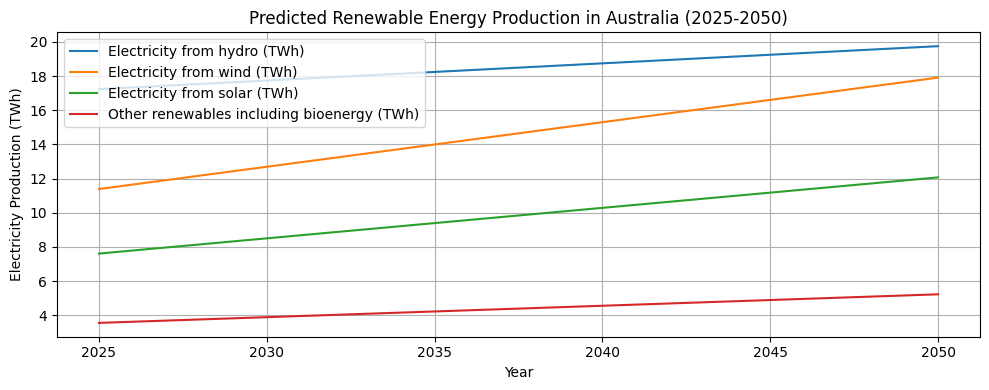

In [71]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('LSTM.db')

# Query to retrieve LSTM predictions
query = "SELECT * FROM predictions"

# Load LSTM predictions from the database into a DataFrame
lstm_predictions = pd.read_sql_query(query, conn)

# Filter the predictions for Australia
australia_predictions = lstm_predictions[lstm_predictions['Entity'] == 'Australia']

# Define the list of feature columns
feature_columns = ['Electricity from hydro (TWh)', 'Electricity from wind (TWh)', 
                   'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)', 
                   'Total (TWh)']

# Plot the predicted outcomes for Australia
plt.figure(figsize=(10, 4))
for column in feature_columns:
    if column != 'Entity' and column != 'Year' and column != 'Total (TWh)':
        plt.plot(
            australia_predictions['Year'],
            australia_predictions[column],
            label=column
        )

plt.title('Predicted Renewable Energy Production in Australia (2025-2050)')
plt.xlabel('Year')
plt.ylabel('Electricity Production (TWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()
